In [1]:
import numpy as np
import cv2
import circular
from keras.models import Model 
from matplotlib import pyplot as plt
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal
from IPython.display import Image, display

In [2]:
model = VGG16()

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
# retrieve kernel weights from the 1st Convolutional layer
kernels, biases = model.layers[1].get_weights()

In [5]:
# View CNN layer 1 architecture
model.layers[1].get_config()

{'name': 'block1_conv1',
 'trainable': True,
 'dtype': 'float32',
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [6]:
img = cv2.imread("C:/Users/PP's Notebook/Desktop/imgProcess/Lab#3/test.jpg")

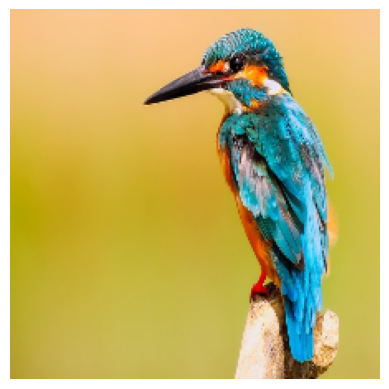

In [7]:
if img is not None:
    # Define the new width and height
    new_width = 224  # Replace with your desired width
    new_height = 224  # Replace with your desired height

    # Resize the image
    resized_image = cv2.resize(img, (new_width, new_height))

    # Convert the BGR image to RGB for proper display
    resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Display the resized image using matplotlib
    plt.imshow(resized_image_rgb)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()
else:
    print('Failed to read the image.')

In [8]:
resized_image_rgb = img_to_array(resized_image_rgb)

In [9]:
resized_image_rgb = expand_dims(resized_image_rgb, axis=0)

In [10]:
resized_image_rgb = preprocess_input(resized_image_rgb)

In [11]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
feature_maps = model.predict(resized_image_rgb)

1/1 [==============================] - 0s 229ms/step


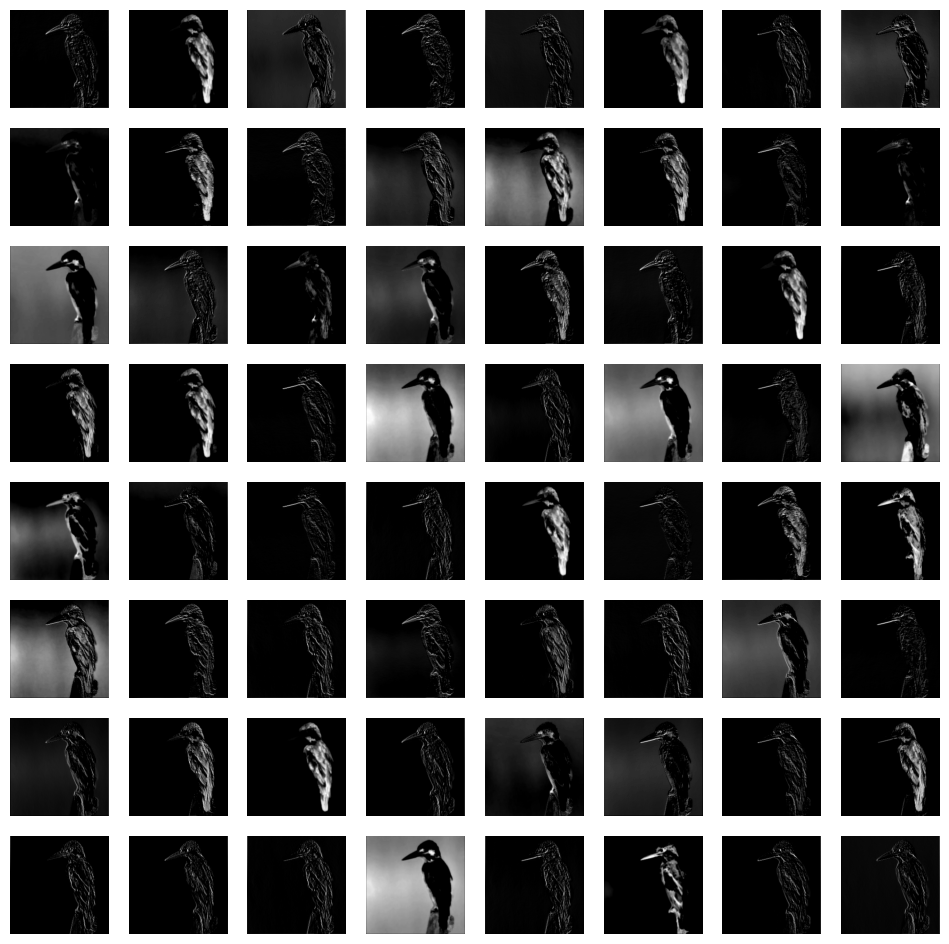

In [14]:
plt.figure(figsize=(12, 12))
for i in range(feature_maps.shape[-1]):
    plt.subplot(8, 8, i + 1)  # Assuming you have 64 feature maps, adjust the grid size accordingly
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')  # You can choose a different colormap
    plt.axis('off')
plt.show()